In [227]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium import plugins
from datetime import datetime
from datetime import timedelta
import math
import random
import timeit

In [228]:
brm = pd.read_csv("../resources/bremen.csv")
frb = pd.read_csv("../resources/freiburg.csv")

In [229]:
brm = pd.read_csv("../resources/bremen.csv", encoding = "ISO-8859-1")
brm.sort_values(["b_number","time"], inplace=True)
brm.set_index(pd.DatetimeIndex(brm["time"]),inplace=True)
brm.drop("time", axis=1, inplace=True)

In [230]:
frb = pd.read_csv("../resources/freiburg.csv", encoding = "ISO-8859-1")
frb.sort_values(["b_number","time"], inplace=True)
frb.set_index(pd.DatetimeIndex(frb["time"]),inplace=True)
frb.drop("time", axis=1, inplace=True)

## Utilization

In [231]:
brm.head()

,day,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng
time,,,,,,,,
2020-07-13 02:18:00,2019-09-15,20507,bremen,0 days 00:10:00.000000000,53.078923,8.884911,53.083370,8.899650
2020-07-13 06:41:00,2019-09-09,20507,bremen,0 days 00:11:00.000000000,53.078923,8.884911,53.079729,8.891353
2020-07-13 07:25:00,2019-09-09,20507,bremen,0 days 00:48:00.000000000,53.079698,8.891367,53.069840,8.801496
2020-07-13 09:16:00,2019-12-07,20507,bremen,0 days 00:06:00.000000000,53.078923,8.884911,53.081427,8.893282
2020-07-13 09:24:00,2019-12-07,20507,bremen,0 days 00:06:00.000000000,53.081529,8.893232,53.078923,8.884911


In [232]:
frb.head()

,day,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng
time,,,,,,,,
2020-07-13 00:19:00,2019-07-30,32560,freiburg,0 days 00:24:00.000000000,47.988072,7.873674,47.997058,7.834818
2020-07-13 00:20:00,2019-08-07,32560,freiburg,0 days 00:46:00.000000000,47.997058,7.834818,47.991031,7.815472
2020-07-13 00:29:00,2019-10-18,32560,freiburg,0 days 00:09:00.000000000,47.989120,7.847720,47.976135,7.828490
2020-07-13 00:52:00,2019-12-17,32560,freiburg,0 days 00:30:00.000000000,47.992361,7.797626,48.008110,7.850470
2020-07-13 01:58:00,2019-10-19,32560,freiburg,0 days 00:21:00.000000000,47.992910,7.847020,47.979980,7.832150


In [233]:
#Mapping weekday, hour, datetime, time to our DF

def date_match (ts):
    return ts.date()

def weekday_match (ts):
    return ts.weekday()

def hour_match (ts):
    return ts.hour

In [234]:
brm["date"]=brm.index.map(date_match)
brm["weekday"]=brm.index.map(weekday_match)
brm["hour"] =brm.index.map(hour_match)

In [235]:
frb["date"]=frb.index.map(date_match)
frb["weekday"]=frb.index.map(weekday_match)
frb["hour"] =frb.index.map(hour_match)

In [236]:
brm.head(5)

,day,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng,date,weekday,hour
time,,,,,,,,,,,
2020-07-13 02:18:00,2019-09-15,20507,bremen,0 days 00:10:00.000000000,53.078923,8.884911,53.083370,8.899650,2020-07-13,0,2
2020-07-13 06:41:00,2019-09-09,20507,bremen,0 days 00:11:00.000000000,53.078923,8.884911,53.079729,8.891353,2020-07-13,0,6
2020-07-13 07:25:00,2019-09-09,20507,bremen,0 days 00:48:00.000000000,53.079698,8.891367,53.069840,8.801496,2020-07-13,0,7
2020-07-13 09:16:00,2019-12-07,20507,bremen,0 days 00:06:00.000000000,53.078923,8.884911,53.081427,8.893282,2020-07-13,0,9
2020-07-13 09:24:00,2019-12-07,20507,bremen,0 days 00:06:00.000000000,53.081529,8.893232,53.078923,8.884911,2020-07-13,0,9


In [237]:
frb.head(5)

,day,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng,date,weekday,hour
time,,,,,,,,,,,
2020-07-13 00:19:00,2019-07-30,32560,freiburg,0 days 00:24:00.000000000,47.988072,7.873674,47.997058,7.834818,2020-07-13,0,0
2020-07-13 00:20:00,2019-08-07,32560,freiburg,0 days 00:46:00.000000000,47.997058,7.834818,47.991031,7.815472,2020-07-13,0,0
2020-07-13 00:29:00,2019-10-18,32560,freiburg,0 days 00:09:00.000000000,47.989120,7.847720,47.976135,7.828490,2020-07-13,0,0
2020-07-13 00:52:00,2019-12-17,32560,freiburg,0 days 00:30:00.000000000,47.992361,7.797626,48.008110,7.850470,2020-07-13,0,0
2020-07-13 01:58:00,2019-10-19,32560,freiburg,0 days 00:21:00.000000000,47.992910,7.847020,47.979980,7.832150,2020-07-13,0,1


## Utilization for bremen's bike fleet

In [238]:
# Total number of bikes
len(brm["b_number"].unique())

441

In [239]:
brm_numberOfBikes = len(brm["b_number"].unique())

print("The total number of bikes in bremen for the observed time is {}.".format(brm_numberOfBikes))

The total number of bikes in bremen for the observed time is 441.


## Percentage usage of bikes in bremen

In [240]:
# Used bikes in bremen daily

brm_numberOfUsedBikes_daily = brm.groupby("day")["b_number"].nunique()
brm_numberOfUniqueBikes_daily = brm_numberOfUsedBikes_daily.count()

In [241]:
brm_numberOfUniqueBikes_daily

363

In [242]:
# Calc percantage usage of bikes daily
brm_percantageUsedPerBike = brm_numberOfUsedBikes_daily / brm_numberOfBikes

In [243]:
brm_percantageUsedPerBike.head(5)

day
2019-01-20    0.136054
2019-01-21    0.174603
2019-01-22    0.195011
2019-01-23    0.147392
2019-01-24    0.176871
Name: b_number, dtype: float64

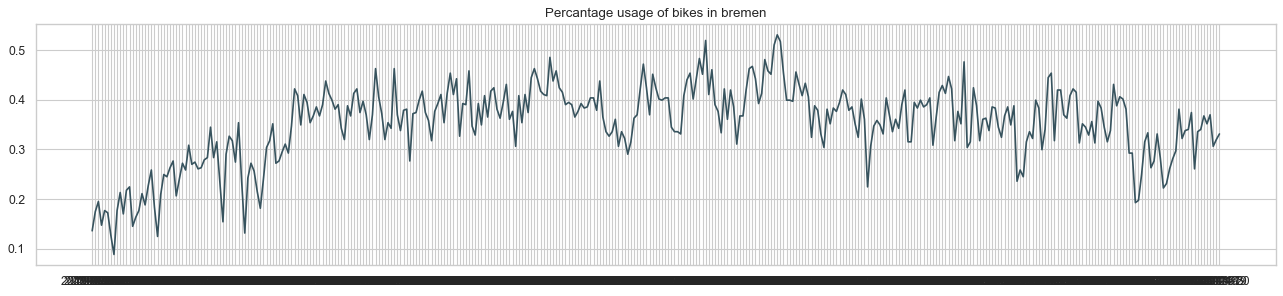

In [244]:
fix, ax = plt.subplots(figsize=(20,4), dpi= 80)

ax.plot(brm_percantageUsedPerBike)
ax.set_title("Percantage usage of bikes in bremen")
plt.show()

## Utilization for freiburg's bike fleet

In [245]:
# Total number of bikes
len(frb["b_number"].unique())

435

In [246]:
frb_numberOfBikes = len(frb["b_number"].unique())

print("The total number of bikes in freiburg for the observed time is {}.".format(frb_numberOfBikes))

The total number of bikes in freiburg for the observed time is 435.


## Percentage usage of bikes in freiburg

In [247]:
# Used bikes in freiburg daily

frb_numberOfUsedBikes_daily = frb.groupby("day")["b_number"].nunique()
frb_numberOfUniqueBikes_daily = frb_numberOfUsedBikes_daily.count()

In [248]:
frb_numberOfUniqueBikes_daily

257

In [249]:
# Calc percantage usage of bikes daily
frb_percantageUsedPerBike = frb_numberOfUsedBikes_daily / frb_numberOfBikes

In [250]:
frb_percantageUsedPerBike.head(5)

day
2019-05-06    0.002299
2019-05-07    0.002299
2019-05-08    0.002299
2019-05-09    0.002299
2019-05-10    0.002299
Name: b_number, dtype: float64

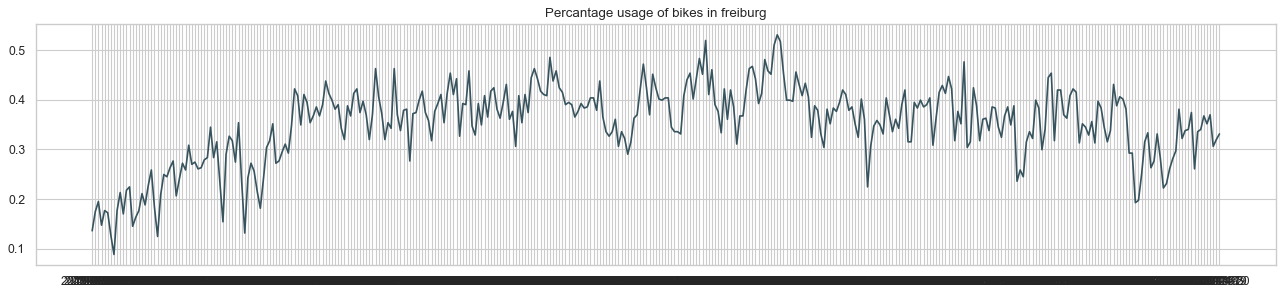

In [251]:
fix, ax = plt.subplots(figsize=(20,4), dpi= 80)

ax.plot(brm_percantageUsedPerBike)
ax.set_title("Percantage usage of bikes in freiburg")
plt.show()

Utilization shows at what point in time the entire fleet is fully utilised. It's useful for the following predictive analysis in case to plan the fleet size.